<a href="https://colab.research.google.com/github/bobbercheng/ventilator-pressure-prediction/blob/master/Analyze_predict_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [3]:
if IN_COLAB:
  from google.colab import drive
  drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [4]:
!mkdir -p ../input/ventilator-pressure-prediction/
!unzip /gdrive/MyDrive/ventilator-pressure-prediction/train_df_pred.zip -d ../input/ventilator-pressure-prediction/

Archive:  /gdrive/MyDrive/ventilator-pressure-prediction/train_df_pred.zip
  inflating: ../input/ventilator-pressure-prediction/train_df_pred.csv  


In [5]:
train_df = pd.read_csv('../input/ventilator-pressure-prediction/train_df_pred.csv')

In [6]:
train_df.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure,pred,mae,RC
0,1,1,20,50,0.000000,0.083334,0,5.837492,5.771471,0.066021,20-50
1,2,1,20,50,0.033652,18.383041,0,5.907794,5.843903,0.063891,20-50
2,3,1,20,50,0.067514,22.509278,0,7.876254,7.968757,0.092503,20-50
3,4,1,20,50,0.101542,22.808822,0,11.742872,11.860165,0.117293,20-50
4,5,1,20,50,0.135756,25.355850,0,12.234987,12.522907,0.287920,20-50


In [19]:
min_above_zero = lambda x: x.min(); min_above_zero.__name__ = 'min_above_zero'
count_not_zero = lambda x: x.count(); count_not_zero.__name__ = 'count_not_zero'

In [8]:
def press_diff(series: np.ndarray):
  return series.diff().abs()

In [9]:
train_df['press_diff'] = train_df.groupby('breath_id')['pressure'].apply(press_diff)

In [20]:
df_feature = train_df[train_df['u_out']<1].groupby('breath_id').agg({'mae': ['mean' , 'max', min_above_zero, count_not_zero], 
                                                                     'RC': ['first'], 
                                                                     'press_diff':['mean', 'max'],
                                                                     'u_in':['first', 'last'],
                                                                     'pressure':['first', 'last']
                                                                     })
df_feature.columns = ['_'.join(col) for col in df_feature.columns]

In [21]:
df_feature.sort_values('mae_mean', ascending=False, inplace=True)
df_feature.reset_index(drop=False, inplace=True)

In [22]:
df_feature.describe()

,breath_id,mae_mean,mae_max,mae_min_above_zero,mae_count_not_zero,press_diff_mean,press_diff_max,u_in_first,u_in_last,pressure_first,pressure_last
count,75450.000000,75450.000000,75450.000000,7.545000e+04,75450.000000,75450.000000,75450.000000,75450.000000,75450.000000,75450.000000,75450.000000
mean,62838.858701,0.168424,0.462340,1.584350e-02,30.364056,1.404805,4.844705,13.910675,7.134116,5.810529,21.616341
std,36335.493977,0.272478,0.520575,6.269222e-02,1.132854,1.706320,5.325277,25.137113,10.074499,1.015653,8.589812
min,1.000000,0.013141,0.036368,6.160459e-08,25.000000,0.029091,0.070302,0.000000,0.000000,-1.825442,-1.755140
25%,31377.250000,0.068210,0.215350,1.384120e-03,29.000000,0.587525,1.616949,0.000000,0.378891,5.485981,14.765864
50%,62765.500000,0.102044,0.324200,3.830603e-03,30.000000,0.886988,2.741784,2.027507,3.397902,6.189002,21.022755
75%,94300.750000,0.167471,0.522680,1.037006e-02,31.000000,1.376952,5.624172,14.088825,9.195561,6.399909,28.685689
max,125749.000000,19.056591,49.328470,2.678620e+00,32.000000,12.951469,54.554465,100.000000,100.000000,7.454441,54.838087


In [23]:
df_feature.head(50)

,breath_id,mae_mean,mae_max,mae_min_above_zero,mae_count_not_zero,RC_first,press_diff_mean,press_diff_max,u_in_first,u_in_last,pressure_first,pressure_last
0,74766,19.056591,49.328470,0.200799,26.0,50-10,3.852558,54.554465,34.916693,0.000000,6.189002,27.701459
1,188,10.933838,16.499965,0.193540,30.0,5-10,0.540599,3.093294,0.000000,1.694347,5.907794,20.319734
2,109693,10.769303,31.540783,0.372334,26.0,50-10,2.542126,16.310098,40.929207,0.000000,6.118700,22.428798
3,105580,6.769434,8.959178,0.152717,32.0,5-20,1.458203,10.334415,18.810191,27.927116,4.431449,25.451790
4,60951,5.226613,6.730862,1.600545,32.0,50-10,0.580560,1.124834,4.278561,3.008934,3.728427,21.725777
5,105546,4.499538,5.950217,0.587631,31.0,50-20,2.392616,8.647164,0.000000,6.981776,6.892024,32.692911
6,19462,4.387097,5.497358,0.016456,32.0,50-10,1.954853,10.334415,0.592467,1.565552,4.290845,30.443243
7,63711,4.356599,5.191386,0.291588,32.0,50-10,1.916300,11.529552,2.298513,2.101772,6.118700,34.309861
8,45690,4.347804,5.499965,0.241048,32.0,50-10,2.097725,9.209581,0.000000,1.774313,6.681117,34.731673
9,112877,4.345136,5.154877,1.557046,30.0,20-10,0.676355,5.342963,4.620296,0.000000,4.853262,22.358496


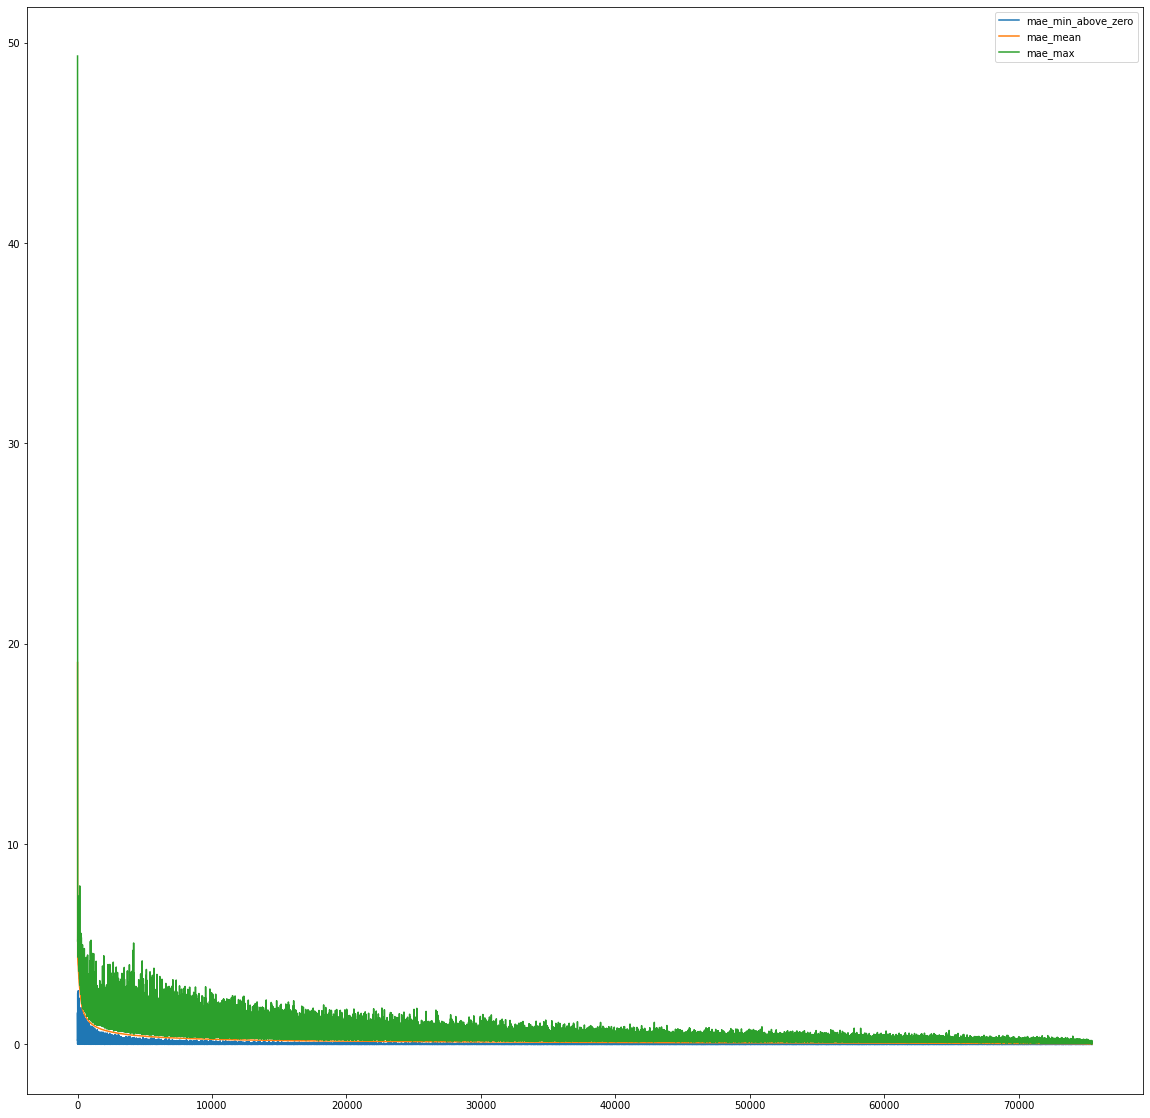

In [24]:
plt.rcParams["figure.figsize"] = (20,20)

plt.plot(df_feature['mae_min_above_zero'], label='mae_min_above_zero')
plt.plot(df_feature['mae_mean'], label='mae_mean')
plt.plot(df_feature['mae_max'], label='mae_max')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


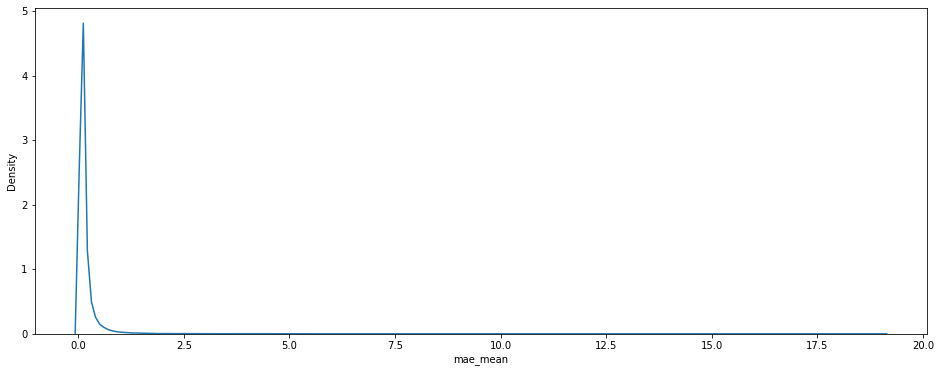

In [33]:
plt.figure(figsize=(16,6))
sns.distplot(df_feature['mae_mean'], hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


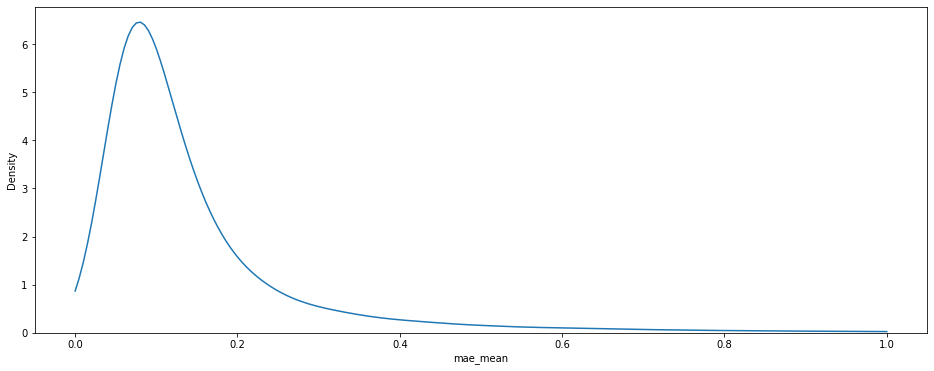

In [32]:
plt.figure(figsize=(16,6))
sns.distplot(df_feature['mae_mean'], hist=False, kde_kws={'clip': (0.0, 1.0)})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


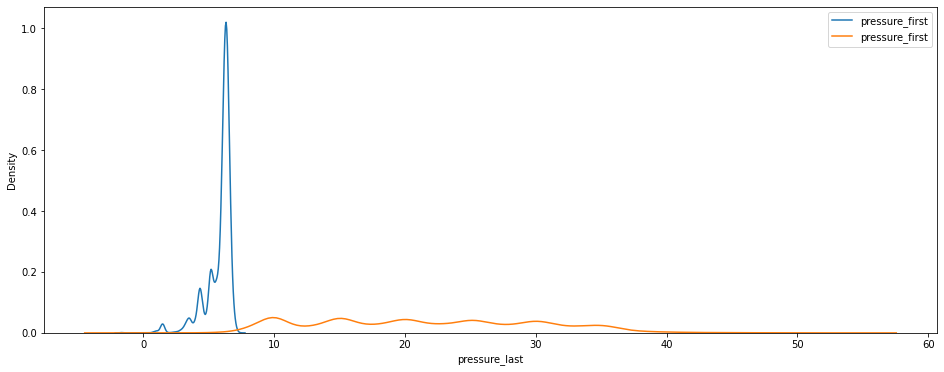

In [36]:

plt.figure(figsize=(16,6))
sns.distplot(df_feature['pressure_first'], hist=False, label='pressure_first')
sns.distplot(df_feature['pressure_last'], hist=False, label='pressure_first')
plt.legend()

In [15]:
train_df[train_df['u_out']<1]['pressure'].nunique()

950

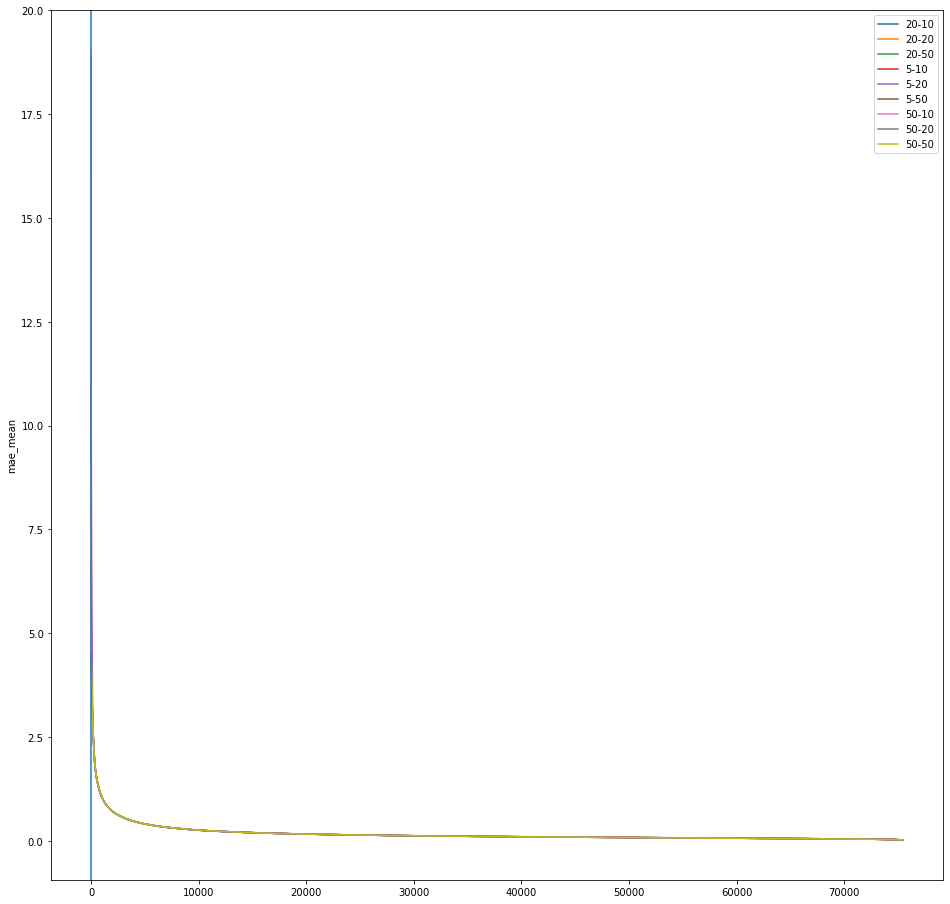

In [55]:
plt.figure(figsize=(16,16))
for key, grp in df_feature.groupby(['RC_first']):
  sns.lineplot(data=grp['mae_mean'], label=key)

plt.axvline(train_df[train_df['u_out']<1]['mae'].mean())

In [16]:
def count_changes(series):
    return series.diff().sum()

In [17]:
agg = train_df.groupby('breath_id').agg({'u_out': count_changes}).reset_index(drop=False)

In [18]:
agg.describe()

,breath_id,u_out
count,75450.000000,75450.0
mean,62838.858701,1.0
std,36335.493977,0.0
min,1.000000,1.0
25%,31377.250000,1.0
50%,62765.500000,1.0
75%,94300.750000,1.0
max,125749.000000,1.0
